In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/Challenge2

/gdrive/My Drive/Challenge2


### Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


### Set seed for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

## Initalization

Load the dataset

In [ ]:
dataset = pd.read_csv('Training.csv')
print(dataset.shape)
dataset.head()

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.97698,4.33494,10.67282,1.76692,3.22440,51.681460,3.65434
1,8.07824,4.44616,10.56160,1.70716,3.32566,51.563598,3.47672
2,8.02844,4.22372,10.56160,1.64906,3.17460,50.863080,3.47672
3,8.02844,4.22372,10.56160,1.70716,3.17460,45.841581,3.47672
4,7.87572,4.44616,10.45038,1.70716,3.27586,47.126421,3.47672


Explore dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float64
 1   Wonder level        68528 non-null  float64
 2   Crunchiness         68528 non-null  float64
 3   Loudness on impact  68528 non-null  float64
 4   Meme creativity     68528 non-null  float64
 5   Soap slipperiness   68528 non-null  float64
 6   Hype root           68528 non-null  float64
dtypes: float64(7)
memory usage: 3.7 MB


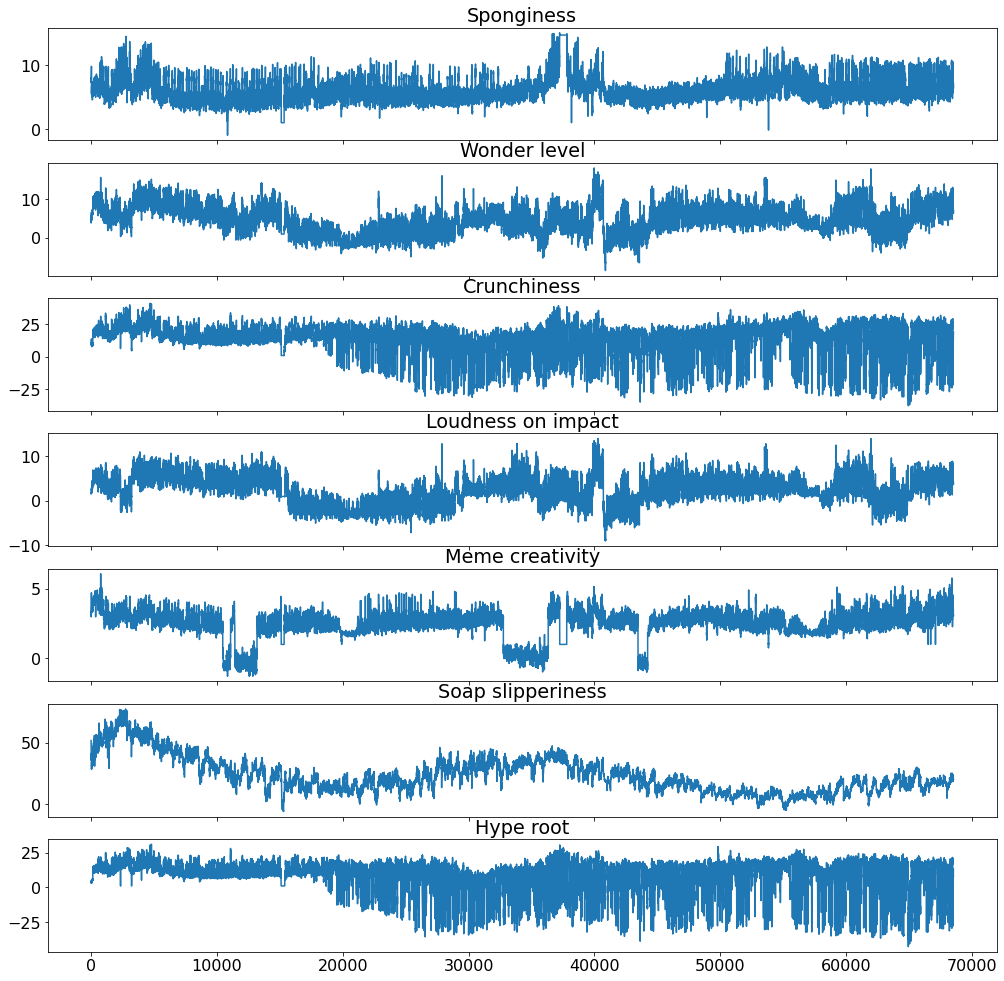

In [ ]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(dataset, dataset.columns)

In [ ]:
dataset.describe()

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
count,68528.000000,68528.000000,68528.000000,68528.000000,68528.000000,68528.000000,68528.000000
mean,6.094102,4.695539,13.337485,2.448660,2.407010,23.237929,8.231283
std,1.941639,3.374224,11.703203,3.001798,0.994063,14.298260,11.285101
min,-0.972080,-8.450380,-37.581721,-9.028060,-1.275860,-6.006860,-42.769221
25%,4.791440,2.223420,10.672820,0.468800,2.112200,12.560240,6.604160
50%,5.702780,4.668600,15.676059,2.533840,2.618500,20.151420,10.968300
75%,7.067300,7.115440,20.568080,4.656980,3.021880,31.245199,15.334100
max,15.106680,18.122899,41.138801,14.035980,6.056360,77.371620,31.024420


##Outlier detection

In [ ]:
#SPONGINESS: up_outlier >14.6 = 570, down_outlier <2 = 249   
mean_sponginess=dataset['Sponginess'].mean()
for x in range(len(dataset['Sponginess'])):
  if (dataset['Sponginess'][x]>14.6):
    dataset['Sponginess'][x]=14.6
  if (dataset['Sponginess'][x]<2):
    dataset['Sponginess'][x]=2
#CRUNCHINESS: up_outlier >34 = 328, down_outlier <-35 = 466
mean_crunchiness=dataset['Crunchiness'].mean()
for x in range(len(dataset['Crunchiness'])):
  if (dataset['Crunchiness'][x]<-26):
    dataset['Crunchiness'][x]=26
  if (dataset['Crunchiness'][x]>34):
    dataset['Crunchiness'][x]=34
#HYPE ROOT: up_outlier >26 = 238, down_outlier <-30 = 542
mean_Hyperoot=dataset['Hype root'].mean()
initial_mean_value=dataset['Hype root'].mean()
for x in range(len(dataset['Hype root'])):
  if (dataset['Hype root'][x]<-30):
    dataset['Hype root'][x]=-30
  if (dataset['Hype root'][x]>26):
    dataset['Hype root'][x]=26
#MEME CREATIVITY: up_outlier >4.3 = 384, down_outlier <-0.8 = 384
mean_Memecreativity=dataset['Meme creativity'].mean()
initial_mean_value=dataset['Meme creativity'].mean()
for x in range(len(dataset['Meme creativity'])):
  if (dataset['Meme creativity'][x]<-0.8):
    dataset['Meme creativity'][x]=-0.8
  if (dataset['Meme creativity'][x]>4.3):
    dataset['Meme creativity'][x]=4.3
#LOUDNESS ON IMPACT: up_outlier >11.5 = 88, down_outlier <-5 = 210   
mean_Loudnessonimpact=dataset['Loudness on impact'].mean()      
for x in range(len(dataset['Loudness on impact'])):
  if (dataset['Loudness on impact'][x]>11.5):
    dataset['Loudness on impact'][x]=11.5
  if (dataset['Loudness on impact'][x]<-5):
    dataset['Loudness on impact'][x]=-5
#WONDER LEVEL: up_outlier >13 = 425, down_outlier <-3 = 296 
mean_Wonderlevel=dataset['Wonder level'].mean()          
for x in range(len(dataset['Wonder level'])):
  if (dataset['Wonder level'][x]>13):
    dataset['Wonder level'][x]=13
  if (dataset['Wonder level'][x]<-3):
    dataset['Wonder level'][x]=-3
#SOAP SLIPPERINESS: up_outlier >69 = 250, down_outlier <-4 = 74 
mean_Soapslipperiness=dataset['Soap slipperiness'].mean()      
for x in range(len(dataset['Soap slipperiness'])):
  if (dataset['Soap slipperiness'][x]>69):
    dataset['Soap slipperiness'][x]=69
  if (dataset['Soap slipperiness'][x]<-4):
    dataset['Soap slipperiness'][x]=-4

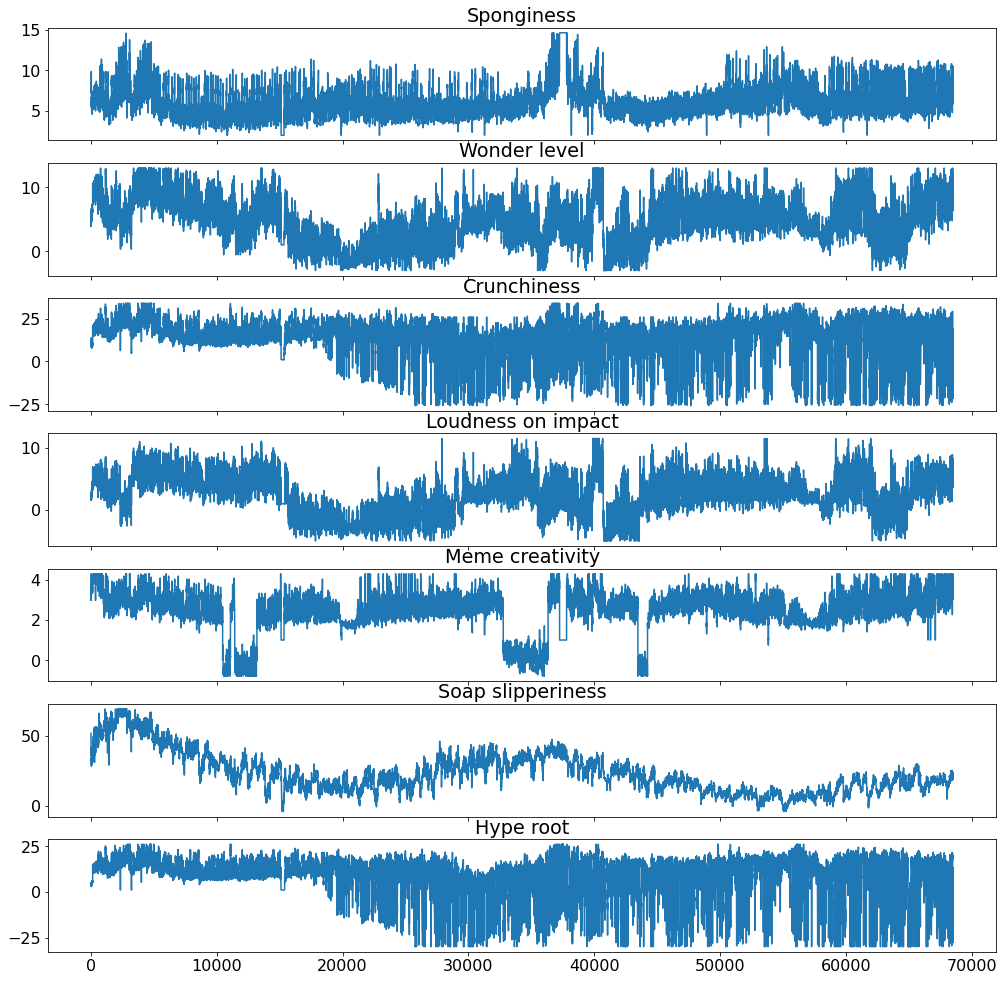

In [ ]:
# dataset without outliers 
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(dataset, dataset.columns)

##Preprocessing of data

Sequential Train-Test split and normalization

(61728, 7) (6800, 7)


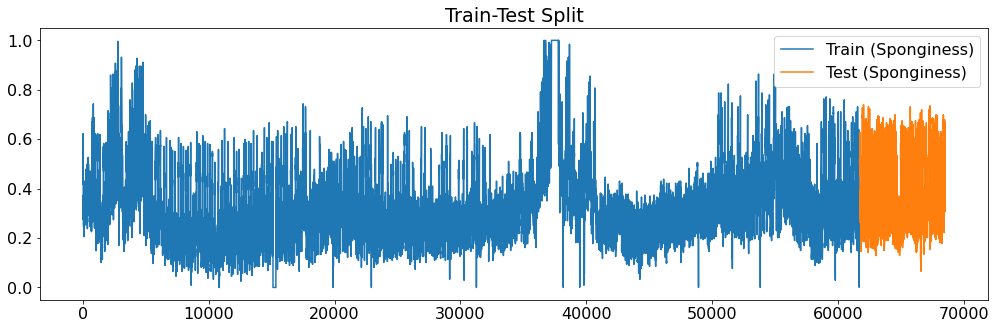

In [ ]:
test_size = 6800 #it's the 10% circa
X_train_raw = dataset.iloc[:-test_size]
X_test_raw = dataset.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(17,5))
plt.plot(X_train_raw.Sponginess, label='Train (Sponginess)')
plt.plot(X_test_raw.Sponginess, label='Test (Sponginess)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [ ]:
window = 1800
stride = 10

In [ ]:
future = dataset[-window:]
future = (future-X_min)/(X_max-X_min)
future = np.expand_dims(future, axis=0)
future.shape

(1, 1800, 7)

In [ ]:
def build_sequences(df, target_labels=['Sponginess'], window=window, stride=stride, telescope=864): 
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.copy().values
    temp_label = df[target_labels].copy().values
    padding_len = len(df)%window

    if(padding_len != 0):
        # Compute padding length
        padding_len = window - len(df)%window
        padding = np.zeros((padding_len,temp_df.shape[1]), dtype='float64')
        temp_df = np.concatenate((padding,df))
        padding = np.zeros((padding_len,temp_label.shape[1]), dtype='float64')
        temp_label = np.concatenate((padding,temp_label))
        assert len(temp_df) % window == 0

    for idx in np.arange(0,len(temp_df)-window-telescope,stride):
        dataset.append(temp_df[idx:idx+window])
        labels.append(temp_label[idx+window:idx+window+telescope])

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

### Multivariate Forecating (Direct)

In [ ]:
target_labels = dataset.columns
telescope = 864 
# we want to predict 864 values

In [ ]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window, stride, telescope)
X_test, y_test = build_sequences(X_test_raw, target_labels, window, stride, telescope)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6034, 1800, 7), (6034, 864, 7), (454, 1800, 7), (454, 864, 7))

In [ ]:
# plot 
def inspect_multivariate(X, y, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

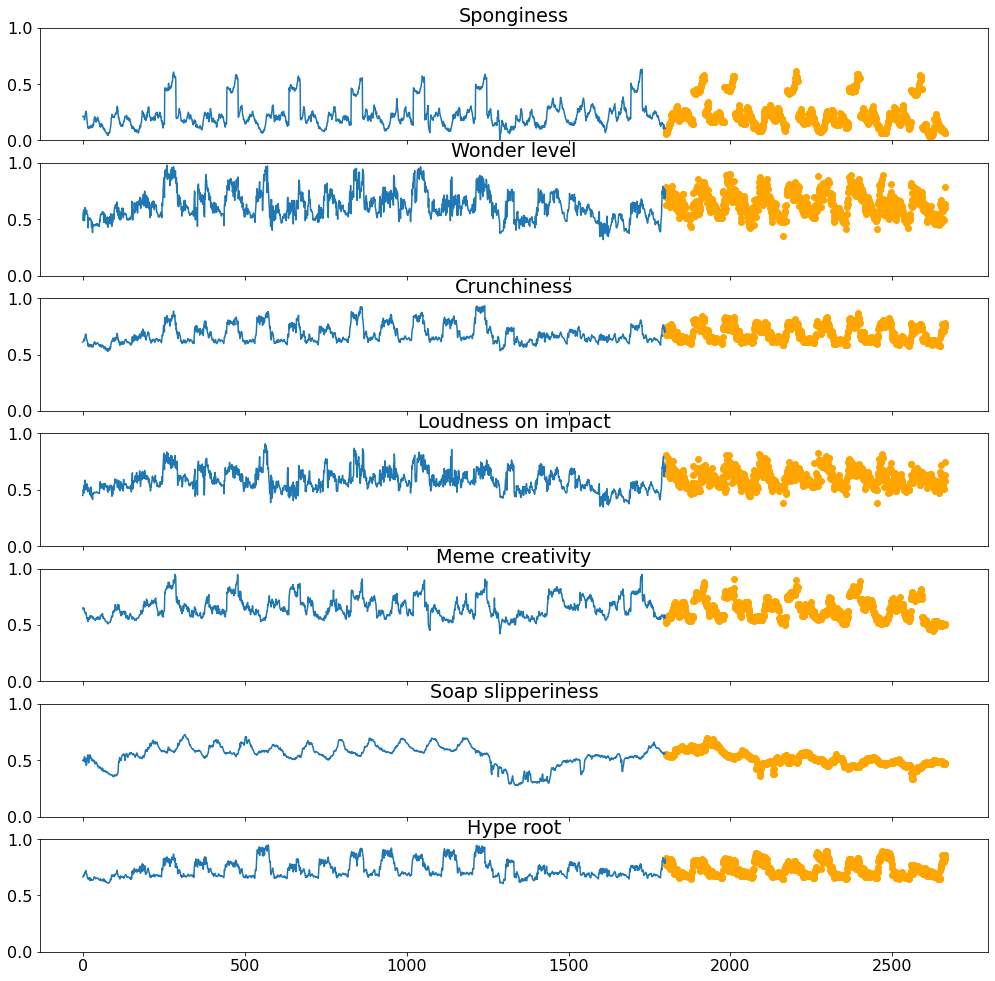

In [ ]:
inspect_multivariate(X_train, y_train, target_labels, telescope)

In [ ]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 64
epochs = 200

##GRU

In [ ]:
def build_BiLSTM(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    gru = tfkl.GRU(256, return_sequences=True)(input_layer) 
    gru = tfkl.GRU(256, return_sequences=True)(gru) 
    gru = tfkl.GRU(128)(gru)
    dropout = tfkl.Dropout(.5, seed=seed)(gru)    
    
    r = tfkl.Dense(256, activation='relu')(dropout)
    dropout = tfkl.Dropout(.2, seed=seed)(r)
    output_layer1 = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='relu')(dropout)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(output_layer1)

    # Connect input and output through the Model class
    modelBi = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    modelBi.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics=[tfk.metrics.RootMeanSquaredError(name='rmse')])

    # Return the model
    return modelBi


   

In [ ]:
modelBi = build_BiLSTM(input_shape, output_shape)
modelBi.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1800, 7)]         0         
                                                                 
 gru (GRU)                   (None, 1800, 256)         203520    
                                                                 
 gru_1 (GRU)                 (None, 1800, 256)         394752    
                                                                 
 gru_2 (GRU)                 (None, 128)               148224    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0     

In [ ]:
# Train the model
history = modelBi.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
85/85 [==============================] - 36s 340ms/step - loss: 0.0597 - rmse: 0.2443 - val_loss: 0.0395 - val_rmse: 0.1987 - lr: 0.0010
Epoch 2/200
85/85 [==============================] - 29s 336ms/step - loss: 0.0319 - rmse: 0.1787 - val_loss: 0.0301 - val_rmse: 0.1735 - lr: 0.0010
Epoch 3/200
85/85 [==============================] - 29s 344ms/step - loss: 0.0268 - rmse: 0.1636 - val_loss: 0.0271 - val_rmse: 0.1645 - lr: 0.0010
Epoch 4/200
85/85 [==============================] - 30s 349ms/step - loss: 0.0246 - rmse: 0.1567 - val_loss: 0.0239 - val_rmse: 0.1546 - lr: 0.0010
Epoch 5/200
85/85 [==============================] - 30s 352ms/step - loss: 0.0230 - rmse: 0.1518 - val_loss: 0.0236 - val_rmse: 0.1536 - lr: 0.0010
Epoch 6/200
85/85 [==============================] - 30s 354ms/step - loss: 0.0217 - rmse: 0.1473 - val_loss: 0.0231 - val_rmse: 0.1521 - lr: 0.0010
Epoch 7/200
85/85 [==============================] - 30s 357ms/step - loss: 0.0205 - rmse: 0.1431 - val_lo

In [ ]:
modelBi.save('Submission22')

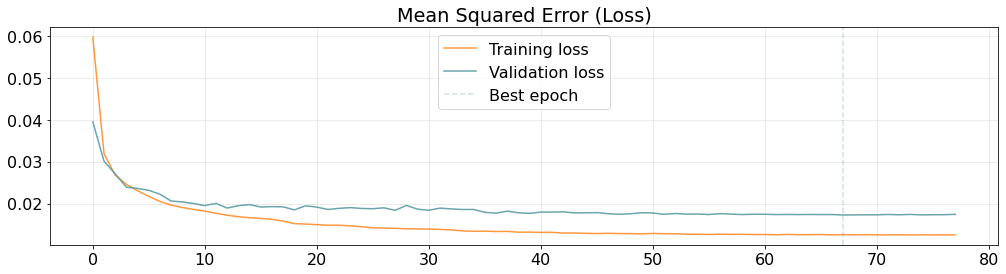

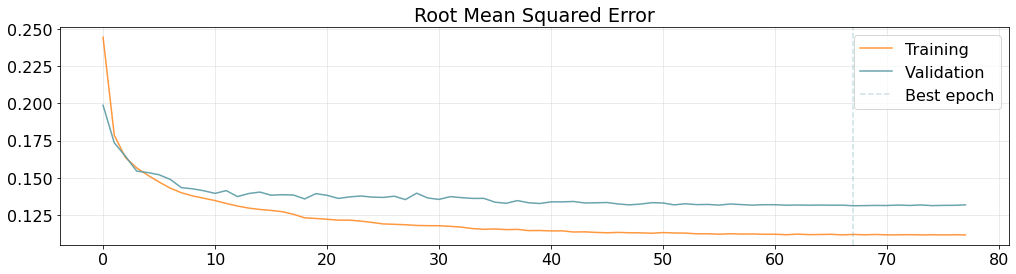

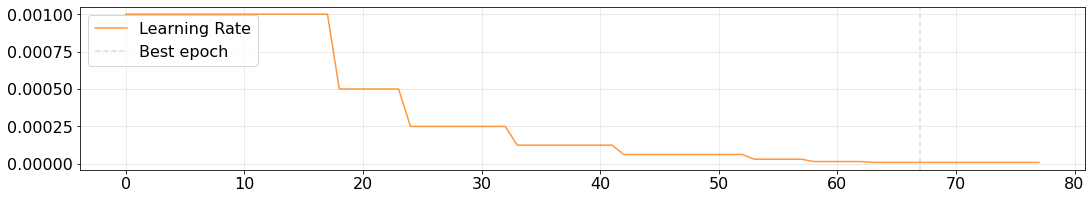

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['rmse'], label='Training ', alpha=.8, color='#ff7f0e')
plt.plot(history['val_rmse'], label='Validation ', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Root Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

Test and evaluation

In [ ]:
# Predict the test set 
predictions = modelBi.predict(X_test)
print(predictions.shape)

mean_absolute_error = tfk.metrics.mae(y_test.flatten(),predictions.flatten())
root_mean_squared_error= tfk.metrics.RootMeanSquaredError()
root_mean_squared_error.update_state(y_test.flatten(),predictions.flatten())
rmse=root_mean_squared_error.result().numpy()
mean_absolute_error, print(rmse)

(454, 864, 7)
0.18649372


(<tf.Tensor: shape=(), dtype=float32, numpy=0.14003827>, None)

In [ ]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

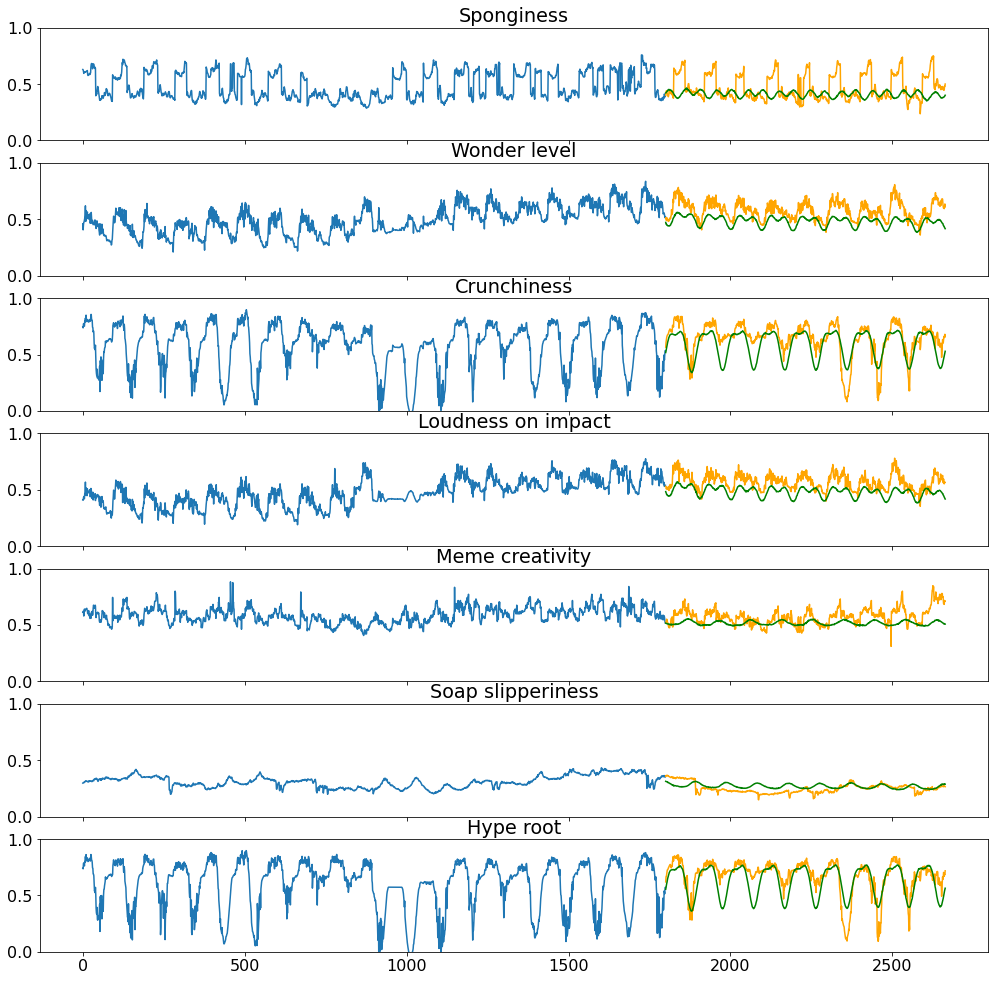

In [ ]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)


Predict the future 

In [ ]:
maes = []
for i in range(predictions.shape[1]):
    ft_maes = []
    for j in range(predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
future_predictions = modelBi.predict(future)

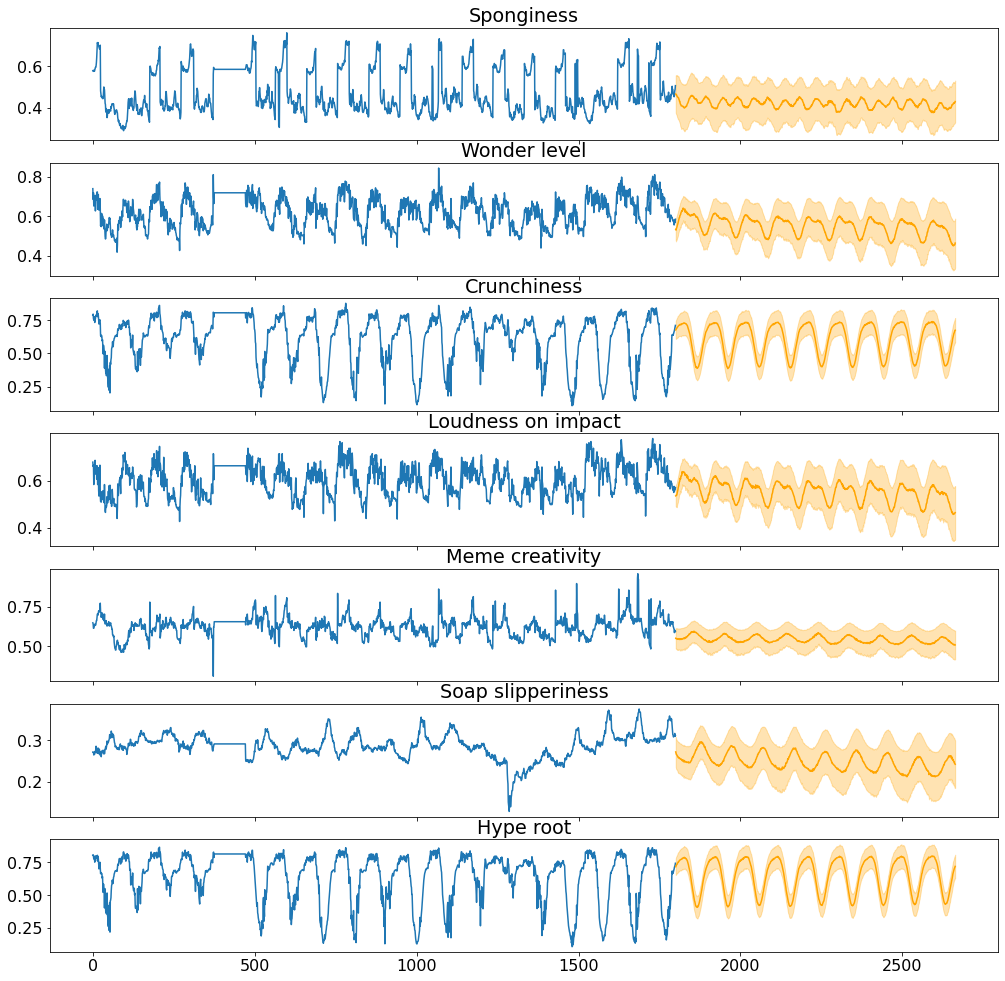

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()

## CNN

In [ ]:
def build_1DCNN(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    #cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    flat = tfkl.Flatten()(cnn)
    dense = tfkl.Dense(128)(flat)
    dropout = tfkl.Dropout(.5, seed=seed)(dense)

    # Classifier
    output_layer1 = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='relu')(dropout)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(output_layer1)

    # Connect input and output through the Model class
    model1D = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model1D.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(),metrics=[tfk.metrics.RootMeanSquaredError(name='rmse')])

    # Return the model
    return model1D

     
   

  

In [ ]:
model1D = build_1DCNN(input_shape, output_shape)
model1D.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1800, 7)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1800, 128)         2816      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 900, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 900, 128)          49280     
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense (Dense)               (None, 128)               14745728  
                                                             

In [ ]:
# Train the model
history = model1D.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
85/85 [==============================] - 17s 57ms/step - loss: 0.0914 - rmse: 0.3023 - val_loss: 0.0245 - val_rmse: 0.1566 - lr: 0.0010
Epoch 2/200
85/85 [==============================] - 4s 49ms/step - loss: 0.0290 - rmse: 0.1702 - val_loss: 0.0221 - val_rmse: 0.1486 - lr: 0.0010
Epoch 3/200
85/85 [==============================] - 4s 52ms/step - loss: 0.0245 - rmse: 0.1564 - val_loss: 0.0213 - val_rmse: 0.1461 - lr: 0.0010
Epoch 4/200
85/85 [==============================] - 4s 49ms/step - loss: 0.0221 - rmse: 0.1486 - val_loss: 0.0185 - val_rmse: 0.1359 - lr: 0.0010
Epoch 5/200
85/85 [==============================] - 4s 49ms/step - loss: 0.0197 - rmse: 0.1402 - val_loss: 0.0163 - val_rmse: 0.1276 - lr: 0.0010
Epoch 6/200
85/85 [==============================] - 4s 51ms/step - loss: 0.0173 - rmse: 0.1315 - val_loss: 0.0145 - val_rmse: 0.1203 - lr: 0.0010
Epoch 7/200
85/85 [==============================] - 4s 49ms/step - loss: 0.0157 - rmse: 0.1254 - val_loss: 0.0148 - 

In [ ]:
model1D.save('Model_cnn2')

Test evaluation

In [ ]:
# Predict the test set 
predictions = model1D.predict(X_test)
print(predictions.shape)


mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions.flatten())
#root_mean_squared_error = tfk.metrics.RootMeanSquaredError(name='root_mean_squared_error', dtype=None)
root_mean_squared_error= tfk.metrics.RootMeanSquaredError()
root_mean_squared_error.update_state(y_test.flatten(),predictions.flatten())
rmse=root_mean_squared_error.result().numpy()
print(rmse)

mean_squared_error

(454, 864, 7)
0.10417007


<tf.Tensor: shape=(), dtype=float32, numpy=0.010851402>

In [ ]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

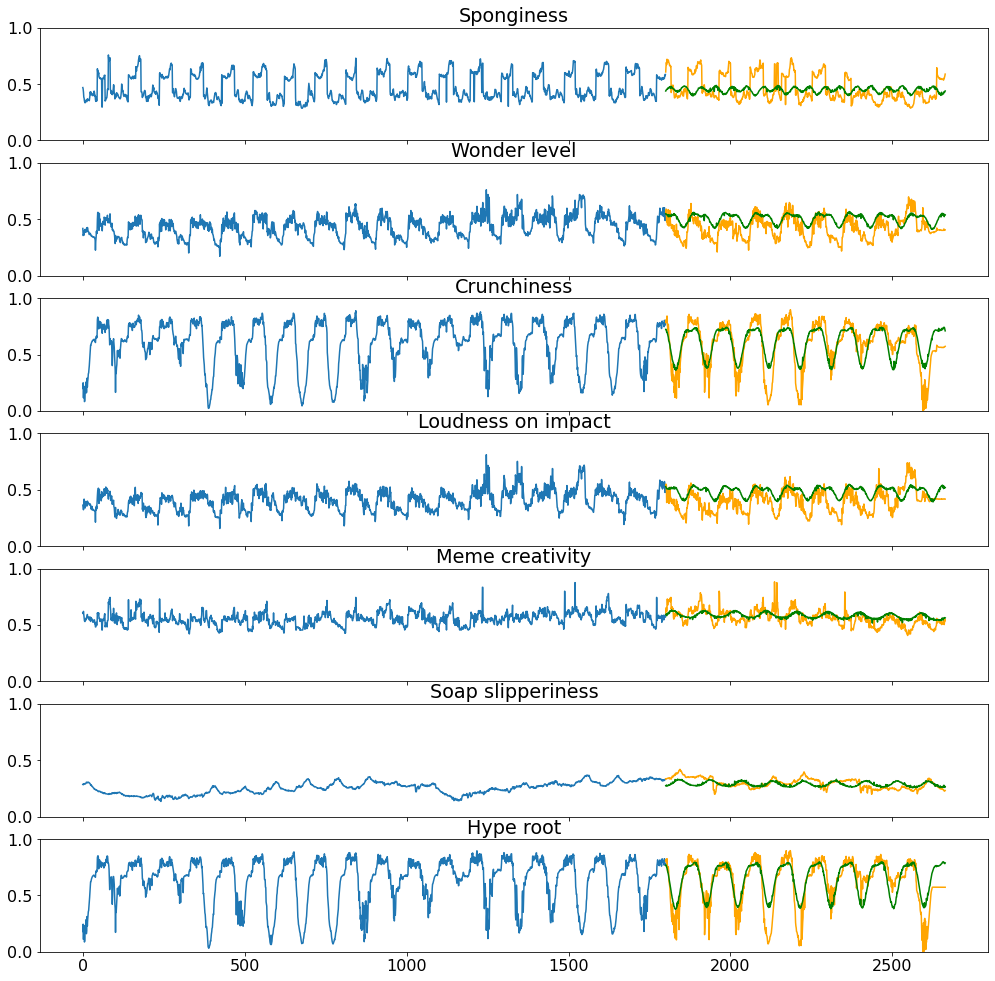

In [ ]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)


Predict the future 

In [ ]:
maes = []
for i in range(predictions.shape[1]):
    ft_maes = []
    for j in range(predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
future_predictions = model1D.predict(future)

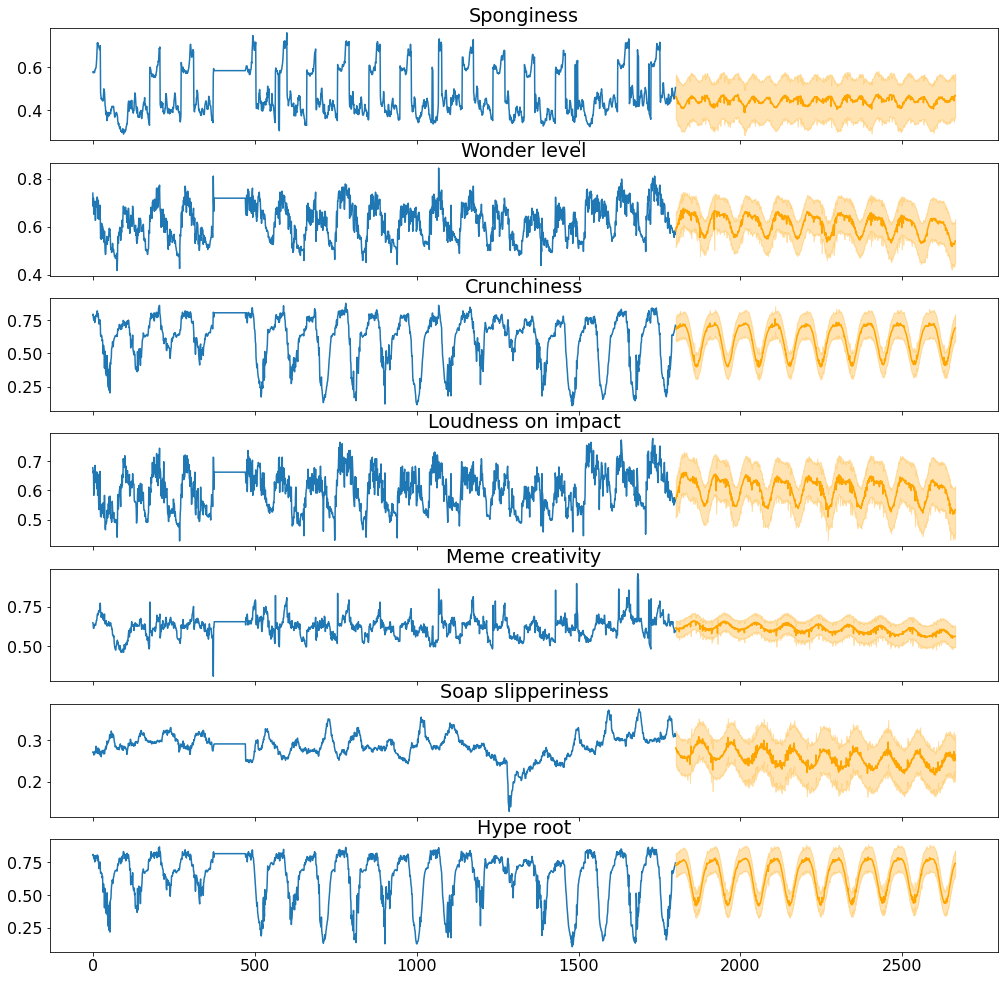

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()

##BiLSTM

In [ ]:
def build_BiLSTM(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    # wrap the lstm in a bidirectional way (forward and backward)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer) # 128x2 output values for each time stamp
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(bilstm) # 128x2 values 
    bilstm = tfkl.Bidirectional(tfkl.LSTM(64))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)
      
    
    r = tfkl.Dense(128, activation='relu')(dropout)
    output_layer1 = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='relu')(r)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(output_layer1)

    # Connect input and output through the Model class
    modelBi = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    modelBi.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics=[tfk.metrics.RootMeanSquaredError(name='rmse')])

    # Return the model
    return modelBi


   

In [ ]:
modelBi = build_BiLSTM(input_shape, output_shape)
modelBi.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2100, 7)]         0         
                                                                 
 bidirectional_12 (Bidirecti  (None, 2100, 256)        139264    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 2100, 256)        394240    
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                             

In [ ]:
# Train the model
history = modelBi.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
85/85 [==============================] - 166s 2s/step - loss: 0.0510 - rmse: 0.2259 - val_loss: 0.0290 - val_rmse: 0.1702 - lr: 0.0010
Epoch 2/200
85/85 [==============================] - 152s 2s/step - loss: 0.0283 - rmse: 0.1683 - val_loss: 0.0291 - val_rmse: 0.1705 - lr: 0.0010
Epoch 3/200
85/85 [==============================] - 152s 2s/step - loss: 0.0263 - rmse: 0.1623 - val_loss: 0.0379 - val_rmse: 0.1947 - lr: 0.0010
Epoch 4/200
85/85 [==============================] - 152s 2s/step - loss: 0.0250 - rmse: 0.1582 - val_loss: 0.0310 - val_rmse: 0.1760 - lr: 0.0010
Epoch 5/200
85/85 [==============================] - 152s 2s/step - loss: 0.0226 - rmse: 0.1504 - val_loss: 0.0267 - val_rmse: 0.1634 - lr: 0.0010
Epoch 6/200
85/85 [==============================] - 152s 2s/step - loss: 0.0215 - rmse: 0.1467 - val_loss: 0.0244 - val_rmse: 0.1562 - lr: 0.0010
Epoch 7/200
85/85 [==============================] - 152s 2s/step - loss: 0.0206 - rmse: 0.1437 - val_loss: 0.0240 - v

Test evaluation

In [ ]:
# Predict the test set 
predictions = modelBi.predict(X_test)
print(predictions.shape)


mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions.flatten())
#root_mean_squared_error = tfk.metrics.RootMeanSquaredError(name='root_mean_squared_error', dtype=None)
root_mean_squared_error= tfk.metrics.RootMeanSquaredError()
root_mean_squared_error.update_state(y_test.flatten(),predictions.flatten())
rmse=root_mean_squared_error.result().numpy()
print(rmse)

mean_squared_error

(544, 864, 7)
0.13485365


<tf.Tensor: shape=(), dtype=float32, numpy=0.018185504>

In [ ]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

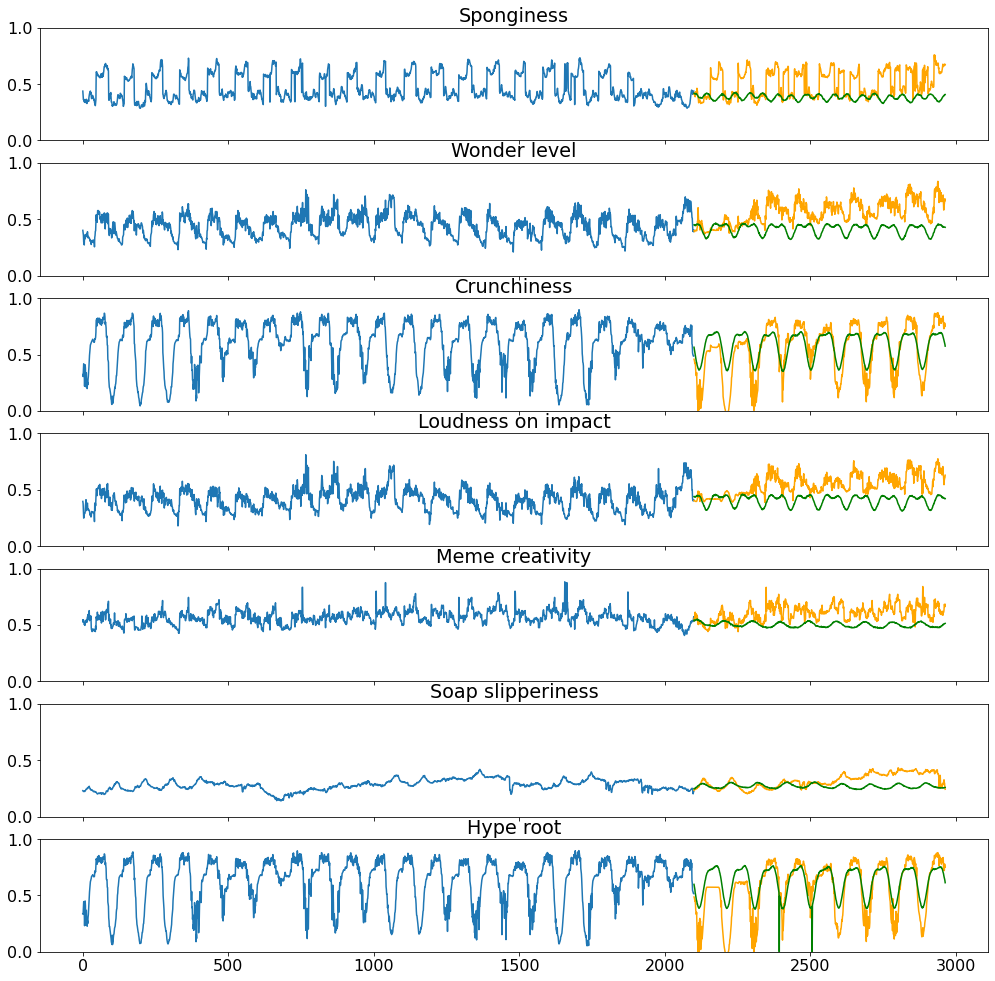

In [ ]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)


Predict the future 

In [ ]:
maes = []
for i in range(predictions.shape[1]):
    ft_maes = []
    for j in range(predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
future_predictions = modelBi.predict(future)

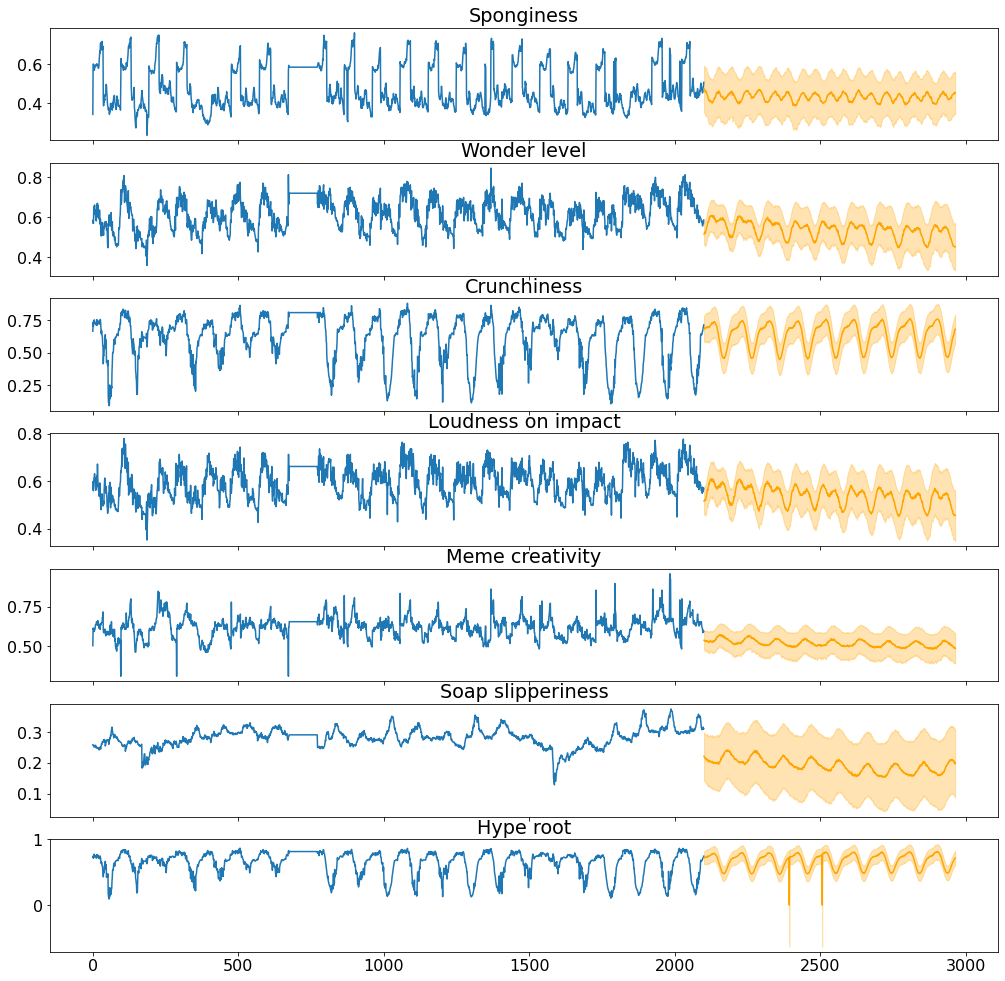

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()

##Mixed model


In [ ]:
def build_CONV_LSTM_model(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    convlstm = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(input_layer)
    convlstm = tfkl.Conv1D(128, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.MaxPool1D()(convlstm)
    convlstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(convlstm)
    convlstm = tfkl.Conv1D(128, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.Flatten()(convlstm)
    convlstm = tfkl.Dense(128)(convlstm)
    convlstm = tfkl.Dropout(.5)(convlstm)
    
    dense = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='relu')(convlstm)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(dense)
    output_layer = tfkl.Conv1D(output_shape[-1], 1, padding='same')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics=['mae'])

    # Return the model
    return model

    #100 final because the model must predict the next 100 values (look at the first dense calculations)


In [ ]:
modelMix = build_CONV_LSTM_model(input_shape, output_shape)
modelMix.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1800, 7)]         0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 1800, 128)        36864     
 nal)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 1800, 128)         49280     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 900, 128)         0         
 1D)                                                             
                                                                 
 bidirectional_9 (Bidirectio  (None, 900, 256)         263168    
 nal)                                                            
                                                             

In [ ]:
# Train the model
history = modelMix.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
85/85 [==============================] - 86s 788ms/step - loss: 0.1850 - mae: 0.3455 - val_loss: 0.0966 - val_mae: 0.2574 - lr: 0.0010
Epoch 2/200
85/85 [==============================] - 65s 762ms/step - loss: 0.0679 - mae: 0.2089 - val_loss: 0.0417 - val_mae: 0.1688 - lr: 0.0010
Epoch 3/200
85/85 [==============================] - 64s 759ms/step - loss: 0.0331 - mae: 0.1431 - val_loss: 0.0265 - val_mae: 0.1204 - lr: 0.0010
Epoch 4/200
85/85 [==============================] - 65s 762ms/step - loss: 0.0229 - mae: 0.1182 - val_loss: 0.0219 - val_mae: 0.1138 - lr: 0.0010
Epoch 5/200
85/85 [==============================] - 65s 766ms/step - loss: 0.0202 - mae: 0.1099 - val_loss: 0.0204 - val_mae: 0.1050 - lr: 0.0010
Epoch 6/200
85/85 [==============================] - 65s 760ms/step - loss: 0.0190 - mae: 0.1064 - val_loss: 0.0204 - val_mae: 0.1058 - lr: 0.0010
Epoch 7/200
85/85 [==============================] - 65s 762ms/step - loss: 0.0180 - mae: 0.1032 - val_loss: 0.0190 - 

In [ ]:
# Predict the test set 
predictions = modelMix.predict(X_test)
print(predictions.shape)


mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions.flatten())
#root_mean_squared_error = tfk.metrics.RootMeanSquaredError(name='root_mean_squared_error', dtype=None)
root_mean_squared_error= tfk.metrics.RootMeanSquaredError()
root_mean_squared_error.update_state(y_test.flatten(),predictions.flatten())
rmse=root_mean_squared_error.result().numpy()
print(rmse)

mean_squared_error

(454, 864, 7)
0.10699829


<tf.Tensor: shape=(), dtype=float32, numpy=0.011448632>

In [ ]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].plot(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

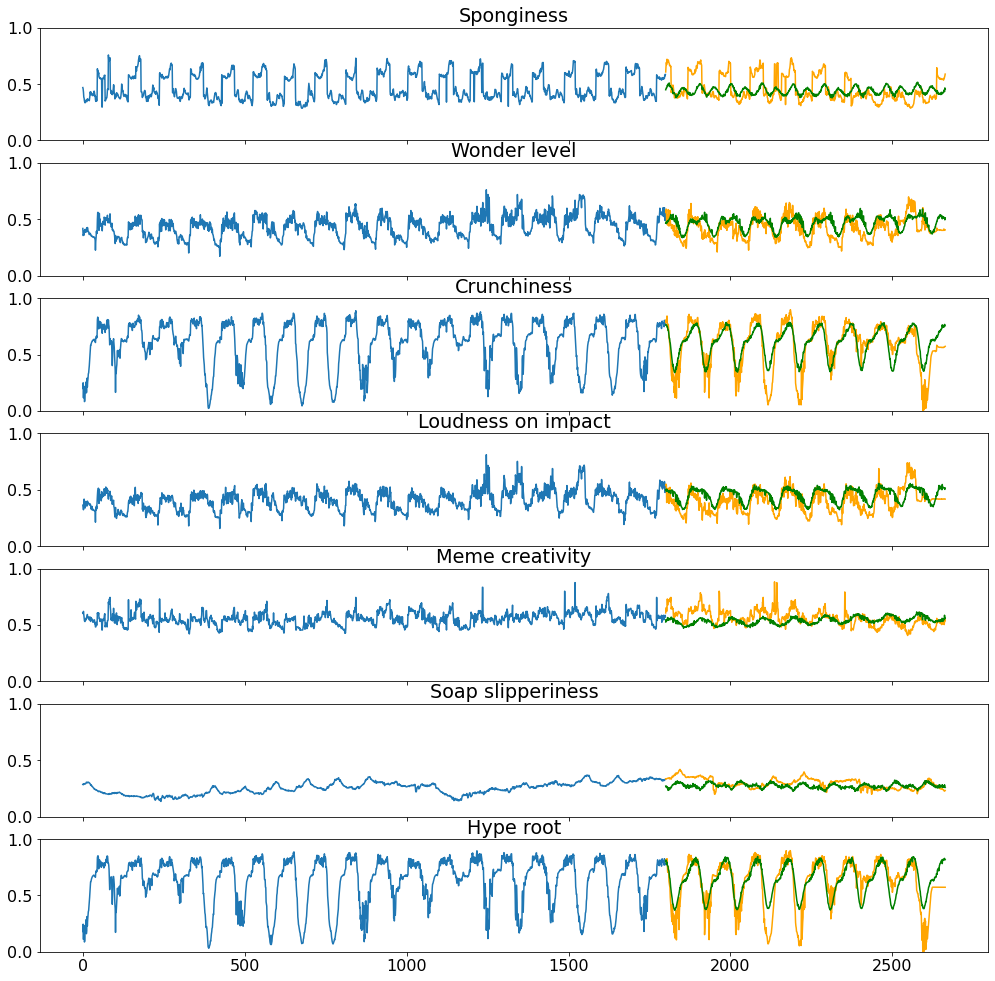

In [ ]:
inspect_multivariate_prediction(X_test, y_test, predictions, target_labels, telescope)


In [ ]:
maes = []
for i in range(predictions.shape[1]):
    ft_maes = []
    for j in range(predictions.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [ ]:
future_predictions = modelMix.predict(future)

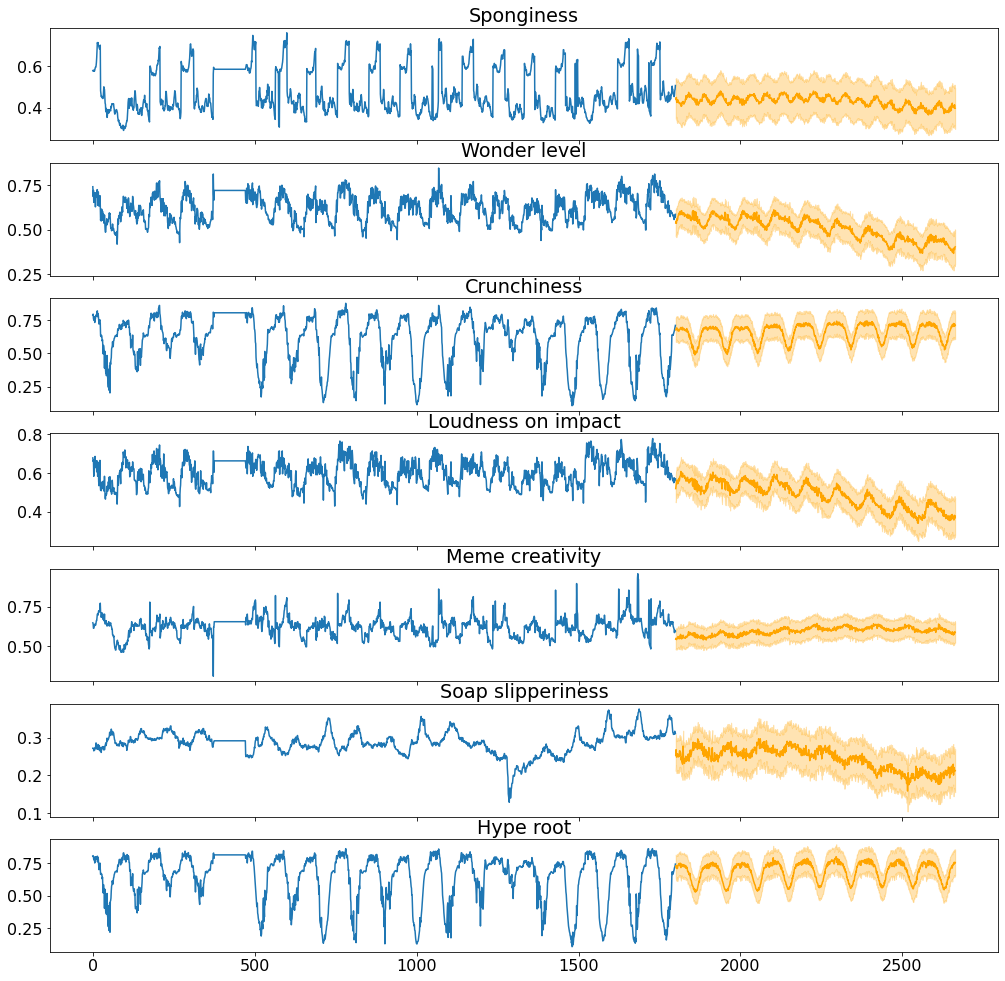

In [ ]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()